In [1]:
import matplotlib.pyplot as plt

from matersdk.toolkit.pwmat.bondfft import Bondfft
from matersdk.io.pwmat.output.movement import Movement
from matersdk.data.deepmd.data_system import DpLabeledSystem

## Step 1. 自定义参数

In [2]:
# 1. Custom Parameter
movement_path = "/data/home/liuhanyu/hyliu/code/mlff/test/demo2/PWdata/data1/MOVEMENT"

element_1 = "Li"
element_2 = "Si"

cutoff = 3.2

tot_running_time = 10   # 单位: ps

## Step 2. 查看 MOVEMENT 的信息

In [3]:
movement = Movement(movement_path=movement_path)
dsys = DpLabeledSystem.from_trajectory_s(movement, rcut=cutoff)
print(dsys)

****************** LabeledSystem Summary *******************
	 * Images Number           : 550           
	 * Atoms Number            : 72            
	 * Virials Information     : True          
	 * Energy Deposition       : True          
	 * Elements List           :
		 - Li: 48              
		 - Si: 24              
************************************************************



## Step 2.1. 查看`cutoff`内，原子的最大近邻原子数

In [4]:
dsys.get_max_nbr_num_real()

14

## Step 3. 运行程序

In [11]:
### Step 3.1. 初始化 Bondfft 对象
bondfft = Bondfft(
                movement_path=movement_path,
                element_1=element_1,
                element_2=element_2,
                cutoff=cutoff)

In [7]:
### Step 3.2. 计算所有构型的 element_1 和 element_2 的平均键长
### Note: 当MOVEMENT结构较多时，这一步比较耗时！
frame_avg_bonds_lst = bondfft.get_frames_avg_bond()

In [20]:
### Step 3.3. 获取时间坐标
steps_lst = [*(range(len(frame_avg_bonds_lst)))]
times_lst = [tmp_step*tot_running_time/len(steps_lst) for tmp_step in steps_lst]
#frame_avg_bonds_lst

# 4. 绘制图像

## Step 4.1. 时域

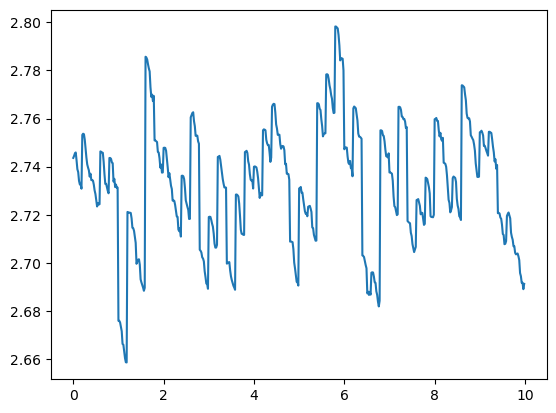

In [19]:
plt.plot(times_lst, frame_avg_bonds_lst)
plt.show()

## Step 4.2.频域